In [24]:
import random

def run_ransac(data, estimate, is_inlier, sample_size, goal_inliers, max_iterations, stop_at_goal=True, random_seed=None):
    best_ic = 0
    best_model = None
    random.seed(random_seed)
    for i in range(max_iterations):
        #s = random.sample(data, int(sample_size))
        s = xyzs[np.random.randint(data.shape[0], size=sample_size), :]
        m = estimate(s)
        ic = 0
        for j in range(len(data)):
            if is_inlier(m, data[j]):
                ic += 1

        print (s)
        print ('estimate:', m)
        print ('# inliers:', ic)

        if ic > best_ic:
            best_ic = ic
            best_model = m
            if ic > goal_inliers and stop_at_goal:
                break
    print ('took iterations:', i+1, 'best model:', best_model, 'explains:', best_ic)
    return best_model, best_ic

[[ 6.88316213  0.94333766  6.88316213]
 [ 0.37509021  6.36567376  0.37509021]
 [ 8.81569774  5.22830967  8.81569774]]
estimate: [ -7.07106781e-01   3.09754315e-17   7.07106781e-01  -3.04185632e-16]
# inliers: 50
took iterations: 1 best model: [ -7.07106781e-01   3.09754315e-17   7.07106781e-01  -3.04185632e-16] explains: 50
plotting chart


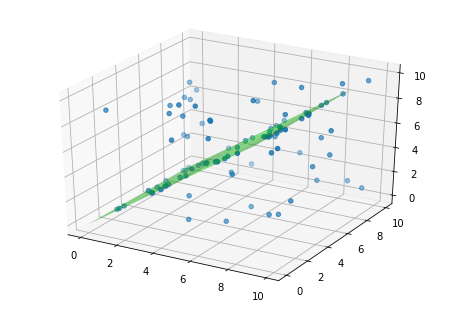

In [39]:
import numpy as np
from matplotlib import pyplot as plt
#from ransac import *


def augment(xyzs):
    axyz = np.ones((len(xyzs), 4))
    axyz[:, :3] = xyzs
    return axyz


def estimate(xyzs):
    axyz = augment(xyzs[:3])
    return np.linalg.svd(axyz)[-1][-1, :]


def is_inlier(coeffs, xyz, threshold):
	return np.abs(coeffs.dot(augment([xyz]).T)) < threshold
	
	
if __name__ == '__main__':
	from matplotlib import pylab
	from mpl_toolkits import mplot3d
	fig = pylab.figure()
	ax = mplot3d.Axes3D(fig)
	
	
def plot_plane(a, b, c, d):
	xx, yy = np.mgrid[:10, :10]
	return xx, yy, (-d - a * xx - b * yy) / c
		
		
n = 100
max_iterations = 100
goal_inliers = n * 0.3


# test data
xyzs = np.random.random((n, 3)) * 10
xyzs[:50, 2:] = xyzs[:50, :1]


ax.scatter3D(xyzs.T[0], xyzs.T[1], xyzs.T[2])


# RANSAC
m, b = run_ransac(xyzs, estimate, lambda x, y: is_inlier(x, y, 0.01), 3, goal_inliers, max_iterations)
a, b, c, d = m
xx, yy, zz = plot_plane(a, b, c, d)
fig = plt.figure()
ax.plot_surface(xx, yy, zz, color=(0, 1, 0, 0.5))

print("plotting chart")
plt.show()

#print(type(xyzs))
#s = np.random.choice(xyzs, int(10))
#xyzs[np.random.randint(xyzs.shape[0], size=5), :]
#s = random.sample(xyzs, int(10))

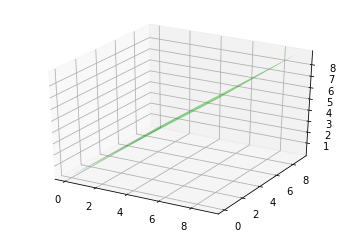

In [42]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, color=(0, 1, 0, 0.5))
plt.show()

#print(xx, yy, zz)

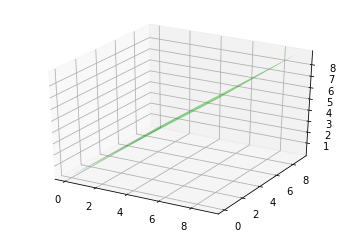

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, color=(0, 1, 0, 0.5))
plt.show()

from IPython.display import HTML
from matplotlib import rc, animation
rc('animation', html='html5')
# how to rotate image

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

def rotate(angle):
    ax.view_init(azim=angle)
    
def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))
    
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

rot_animation